# Example usage

## Introduction
This tutorial will guide you through the process of using the `traders_copilot_mzza_25` package to generate synthetic data, calculate technical indicators, generate trading signals, and visualize the results. By the end of this tutorial, you will be able to:
- Generate synthetic financial data.
- Calculate Simple Moving Averages (SMA) and Relative Strength Index (RSI).
- Generate trading signals based on these indicators.
- Visualize the trading signals.

## Prerequisites
Before starting, ensure you have poetry installed.

You can install the necessary packages using pip:
```
poetry install

### Step 1: Import package

First, let's import the necessary modules.

In [65]:
import sys
import os
sys.path.insert(0, os.path.abspath("../src/traders_copilot_mzza_25"))
from data import generate_synthetic_data
from generate_signals import generate_signals
from indicators import calculate_sma, calculate_rsi
from plot_signals import plot_signals

### Step 2: Simulate market data

generate_synthetic_data function simulate and mock stock market data. To create this data, we just feed the function with start_date and end_date. See the following as a reference.

In [66]:
data = generate_synthetic_data(start_date='2024-01-24', end_date='2025-01-24')
data.head()

Open        High        Low      Close  \
Date                                                                         
2024-01-24 00:00:00.000000000  99.928843  100.044998  97.405803  99.392452   
2024-01-25 10:59:45.657370517  98.827472  100.329171  97.915188  99.266316   
2024-01-26 21:59:31.314741035  99.092509  100.056103  97.373548  98.581710   
2024-01-28 08:59:16.972111553  98.751133  101.501051  98.076428  99.510424   
2024-01-29 19:59:02.629482071  96.854629   98.765622  95.809883  97.666023   

                                Adj Close   Volume  
Date                                                
2024-01-24 00:00:00.000000000   98.998517  2326182  
2024-01-25 10:59:45.657370517   99.016852  1158981  
2024-01-26 21:59:31.314741035   99.051793  3750125  
2024-01-28 08:59:16.972111553  100.140903  2286181  
2024-01-29 19:59:02.629482071   98.213417  4476945

### Step 3: Calculate SMA and RSI 
Next, we will calculate the 50-day and 200-day Simple Moving Averages (SMA) and the Relative Strength Index (RSI).

In [67]:
df = calculate_sma(data)
df = calculate_sma(df, window=200)
df = calculate_rsi(df)
df.tail()

Open       High        Low      Close  \
Date                                                                        
2025-01-18 04:00:57.370517928  91.959360  92.883993  90.645464  91.682608   
2025-01-19 15:00:43.027888444  89.082718  89.795115  88.093807  89.172598   
2025-01-21 02:00:28.685258964  88.732447  90.014889  87.199751  89.052995   
2025-01-22 13:00:14.342629480  89.753709  90.472598  88.084142  89.486444   
2025-01-24 00:00:00.000000000  89.419051  89.657292  87.314952  89.056796   

                               Adj Close   Volume     SMA_50    SMA_200  \
Date                                                                      
2025-01-18 04:00:57.370517928  91.453026  3151998  97.137544  95.892522   
2025-01-19 15:00:43.027888444  88.906226  3992793  97.016632  95.822201   
2025-01-21 02:00:28.685258964  88.517798  4121202  96.922096  95.747801   
2025-01-22 13:00:14.342629480  90.339135  2488863  96.815964  95.681511   
2025-01-24 00:00:00.000000000  89.105905  4343385  96.708851  95.614732   

                                     RSI  
Date                                      
2025-01-18 04:00:57.370517928  28.366691  
2025-01-19 15:00:43.027888444  29.214917  
2025-01-21 02:00:28.685258964  29.825972  
2025-01-22 13:00:14.342629480  28.945325  
2025-01-24 00:00:00.000000000  32.431338

### Step 4: Generating Trading Signals
generate_signals function create a new column that help trader decides to buy or sell the stock
The following signals help traders make decisions:
- Buy Signal: Indicates a potential buying opportunity.
- Sell Signal: Indicates a potential selling opportunity
Conditions for a buy signal:
- SMA_50 > SMA_200: The short-term trend (50-day SMA) is above the long-term trend (200-day SMA), indicating upward momentum.
- RSI < 30: The stock is oversold, suggesting a potential price rebound.
Conditions for a sell signal:
- SMA_50 < SMA_200: The short-term trend is below the long-term trend, indicating downward momentum.
- RSI > 70: The stock is overbought, suggesting a potential price decline.


In [68]:
df = generate_signals(df)
df

Open        High        Low      Close  \
Date                                                                         
2024-01-24 00:00:00.000000000  99.928843  100.044998  97.405803  99.392452   
2024-01-25 10:59:45.657370517  98.827472  100.329171  97.915188  99.266316   
2024-01-26 21:59:31.314741035  99.092509  100.056103  97.373548  98.581710   
2024-01-28 08:59:16.972111553  98.751133  101.501051  98.076428  99.510424   
2024-01-29 19:59:02.629482071  96.854629   98.765622  95.809883  97.666023   
...                                  ...         ...        ...        ...   
2025-01-18 04:00:57.370517928  91.959360   92.883993  90.645464  91.682608   
2025-01-19 15:00:43.027888444  89.082718   89.795115  88.093807  89.172598   
2025-01-21 02:00:28.685258964  88.732447   90.014889  87.199751  89.052995   
2025-01-22 13:00:14.342629480  89.753709   90.472598  88.084142  89.486444   
2025-01-24 00:00:00.000000000  89.419051   89.657292  87.314952  89.056796   

                                Adj Close   Volume     SMA_50    SMA_200  \
Date                                                                       
2024-01-24 00:00:00.000000000   98.998517  2326182        NaN        NaN   
2024-01-25 10:59:45.657370517   99.016852  1158981        NaN        NaN   
2024-01-26 21:59:31.314741035   99.051793  3750125        NaN        NaN   
2024-01-28 08:59:16.972111553  100.140903  2286181        NaN        NaN   
2024-01-29 19:59:02.629482071   98.213417  4476945        NaN        NaN   
...                                   ...      ...        ...        ...   
2025-01-18 04:00:57.370517928   91.453026  3151998  97.137544  95.892522   
2025-01-19 15:00:43.027888444   88.906226  3992793  97.016632  95.822201   
2025-01-21 02:00:28.685258964   88.517798  4121202  96.922096  95.747801   
2025-01-22 13:00:14.342629480   90.339135  2488863  96.815964  95.681511   
2025-01-24 00:00:00.000000000   89.105905  4343385  96.708851  95.614732   

                                     RSI Signal  
Date                                             
2024-01-24 00:00:00.000000000        NaN   HOLD  
2024-01-25 10:59:45.657370517        NaN   HOLD  
2024-01-26 21:59:31.314741035        NaN   HOLD  
2024-01-28 08:59:16.972111553        NaN   HOLD  
2024-01-29 19:59:02.629482071        NaN   HOLD  
...                                  ...    ...  
2025-01-18 04:00:57.370517928  28.366691    BUY  
2025-01-19 15:00:43.027888444  29.214917    BUY  
2025-01-21 02:00:28.685258964  29.825972    BUY  
2025-01-22 13:00:14.342629480  28.945325    BUY  
2025-01-24 00:00:00.000000000  32.431338   HOLD  

[252 rows x 10 columns]

### Step 5: Visualizing Trading Signals

For visualization, we can use plot_signals to create a line plot. The chart plots time on x-axis and price on y-axis. Refer to the following code below.

Debug: Non-missing Length of Close = 252, Non-missing Length of Date = 252


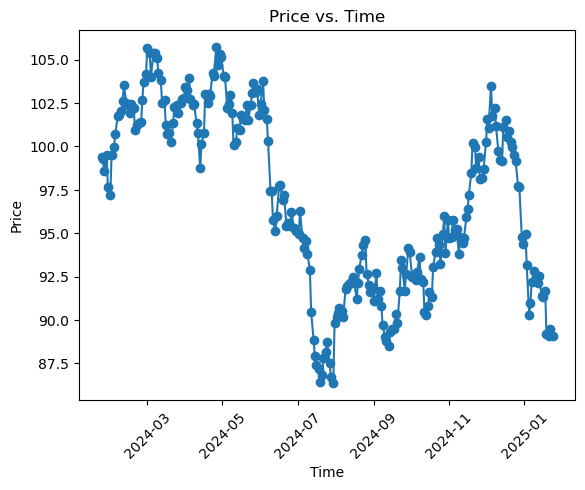

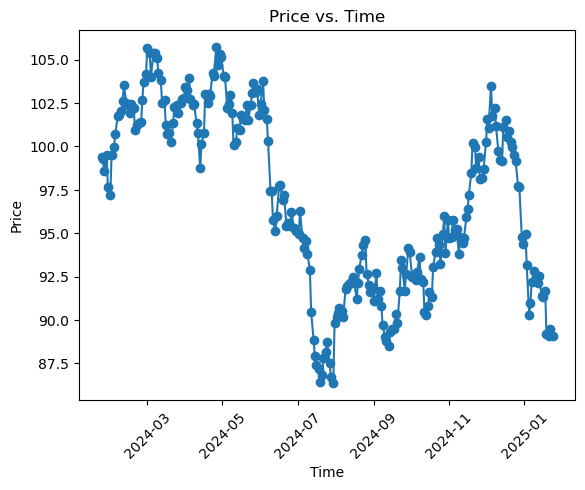

In [69]:
df = df.reset_index()
df['Date'] =  df['Date'].dt.date
plot_signals(df)

## Conclusion
In this tutorial, we covered how to generate synthetic financial data, calculate technical indicators, generate trading signals, and visualize the results using the traders_copilot_mzza_25 package. You can further explore the package by experimenting with different parameters and indicators.

## Next steps

- Try modifying the parameters of the generate_synthetic_data function to see how it affects the generated data.

- Experiment with different windows for the SMA and RSI calculations.

- Explore additional technical indicators and incorporate them into your analysis.

